# Pandas

![](http://pandas.pydata.org/_static/pandas_logo.png)
[Pandas](http://pandas.pydata.org/) is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. Pandas is free software released under the three-clause BSD license. The name is derived from the term _panel data_, an econometrics term for multidimensional structured data sets.

#### Contents
* [Series](#Series)
* [DataFrames](#DataFrames)



NB: This notebook misses some methods of joining and concatenating and merging data. The instances in which those are useful are quite specific, so we'll see some examples but won't have a section in this notebook for reference. 

#### Resources:  
* [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/index.html), especially
[10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
* [The Data Incubator](https://www.thedataincubator.com/)  
* [Hernan Rojas' learn-pandas](https://bitbucket.org/hrojas/learn-pandas)  
* [Harvard CS109 lab1 content](https://github.com/cs109/2015lab1)

## Series

In [1]:
#import pandas library as pd
import pandas as pd
#import matplotlib library as plt 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create a pandas series from list
#observe the dtype
animals = ['Tiger', 'Bear', 'Moose']
pd.Series(animals)

0    Tiger
1     Bear
2    Moose
dtype: object

In [3]:
#create a pandas series from list
#observe the dtype
numbers = [1, 2, 3]
pd.Series(numbers)

0    1
1    2
2    3
dtype: int64

In [4]:
#create a pandas series with None
#observe the dtype
animals = ['Tiger', 'Bear', None]
pd.Series(animals)

0    Tiger
1     Bear
2     None
dtype: object

In [5]:
#create a pandas series with None
#observe the dtype
numbers = [1, 2, None]
pd.Series(numbers)

0    1.0
1    2.0
2    NaN
dtype: float64

In [6]:
#create a pandas series from dictionary
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'}
s = pd.Series(sports)
s

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

In [7]:
#check the type for s
type(s)

pandas.core.series.Series

In [8]:
#notice the index for s
s.index

Index(['Archery', 'Golf', 'Sumo', 'Taekwondo'], dtype='object')

In [9]:
s.values

array(['Bhutan', 'Scotland', 'Japan', 'South Korea'], dtype=object)

In [10]:
s['Golf']

'Scotland'

In [11]:
#create a series from list and index
sr = pd.Series(['Tiger', 'Bear', 'Moose'], index=['India', 'America', 'Canada'])
sr

India      Tiger
America     Bear
Canada     Moose
dtype: object

In [12]:
#create an index with no value
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'}
sp1 = pd.Series(sports, index=['Golf', 'Sumo', 'Hockey'])
sp1

Golf      Scotland
Sumo         Japan
Hockey         NaN
dtype: object

## Exercise


In [13]:
# Which country is famous for Sumo?
sports['Sumo']

'Japan'

## Querying a series

In [14]:
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'}
s = pd.Series(sports)
s

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

In [ ]:
s.iloc?

In [17]:
#iloc to query based on index
s.iloc[3]

'South Korea'

In [18]:
#loc to query based on location
s.loc['Golf']

'Scotland'

In [19]:
#to query based on index
s[3]

'South Korea'

In [20]:
s['Golf']

'Scotland'

In [21]:
sports = {99: 'Bhutan',
          100: 'Scotland',
          101: 'Japan',
          102: 'South Korea'}
s = pd.Series(sports)

In [ ]:
s[0] #This won't call s.iloc[0] as one might expect, it generates an error instead

In [23]:
s[99]

'Bhutan'

In [24]:
s.iloc[0]

'Bhutan'

In [25]:
#create a pandas series from a list and a dictionary
original_sports = pd.Series({'Archery': 'Bhutan',
                             'Golf': 'Scotland',
                             'Sumo': 'Japan',
                             'Sepak takraw': 'Malaysia',
                             'Taekwondo': 'South Korea'})

cricket_loving_countries = pd.Series(['Australia',
                                      'Barbados',
                                      'Pakistan',
                                      'England'], 
                                index=['Cricket',
                                       'Cricket',
                                       'Cricket',
                                       'Cricket'])
# all_countries = original_sports.append(cricket_loving_countries)
all_countries = pd.concat([original_sports, cricket_loving_countries])

In [26]:
all_countries

Archery              Bhutan
Golf               Scotland
Sumo                  Japan
Sepak takraw       Malaysia
Taekwondo       South Korea
Cricket           Australia
Cricket            Barbados
Cricket            Pakistan
Cricket             England
dtype: object

## Exercise

In [27]:
#using loc to list all countries with the index 'Cricket'
all_countries.loc['Cricket']

Cricket    Australia
Cricket     Barbados
Cricket     Pakistan
Cricket      England
dtype: object

## DataFrames


A data frame is like a table, with rows and columns (e.g., as in SQL or Excel).  
Except that :
  - The rows can be indexed by something interesting (there is special support for labels like categorical and timeseries data).
  - Cells can store any Python object. Like in SQL, columns must have a homogenous type.
  - Instead of "NULL", the name for a non-existent value is "NA".  Unlike R, Python's data frames only support NAs in columns of some data types (basically: floating point numbers and 'objects') -- but this is mostly a non-issue (because it will "up-type" integers to float64, etc.)
  
Each of a ```DataFrame```'s columns are an individual ```Series```, (more correctly, a dataframe is a dictionary of Series).  The entires series must have a homogenous type. 

In [28]:
# Example 1
# Let's make a dataset that consists of Malaysian States
# and the size of each state in km2.  Let's try and rank 
# the states of Malaysia by land area, and figure out if East
# Malaysia is larger or smaller than West Malaysia

states = ['Johor','Kedah','Kelantan','Melaka', 
          'Negeri Sembilan','Pahang','Perak','Perlis',
          'Penang','Sabah', 'Sarawak','Selangor','Terengganu']
area = [19210,9500,15099,1664,6686,36137,21035,
        821,1048,73631,124450,8104,13035]

In [29]:
# Use the zip function to merge the two lists together
zip?

Init signature: zip(self, /, *args, **kwargs)
Docstring:     
zip(*iterables, strict=False) --> Yield tuples until an input is exhausted.

   >>> list(zip('abcdefg', range(3), range(4)))
   [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]

The zip object yields n-length tuples, where n is the number of iterables
passed as positional arguments to zip().  The i-th element in every tuple
comes from the i-th iterable argument to zip().  This continues until the
shortest argument is exhausted.

If strict is true and one of the arguments is exhausted before the others,
raise a ValueError.
Type:           type
Subclasses:     

In [30]:
# Area Data Set
state_area = list(zip(states, area))
state_area

[('Johor', 19210),
 ('Kedah', 9500),
 ('Kelantan', 15099),
 ('Melaka', 1664),
 ('Negeri Sembilan', 6686),
 ('Pahang', 36137),
 ('Perak', 21035),
 ('Perlis', 821),
 ('Penang', 1048),
 ('Sabah', 73631),
 ('Sarawak', 124450),
 ('Selangor', 8104),
 ('Terengganu', 13035)]

We now will use the ***pandas*** library to export this data set into a csv file. 

***df*** will be a ***DataFrame*** object. You can think of this object holding the contents of states in a format similar to a sql table or an excel spreadsheet. Lets take a look below at the contents inside ***df***.

In [31]:
df = pd.DataFrame(data = state_area, columns=['State', 'Area'])
#head to show first 5 rows of data
df.head()

,State,Area
0,Johor,19210
1,Kedah,9500
2,Kelantan,15099
3,Melaka,1664
4,Negeri Sembilan,6686


In [32]:
print((type(df)))
print() 
print((df.info()))

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   13 non-null     object
 1   Area    13 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 336.0+ bytes
None


In [33]:
#provide statistical summary for the whole dataset
df.describe()

,Area
count,13.000000
mean,25416.923077
std,35627.125329
min,821.000000
25%,6686.000000
50%,13035.000000
75%,21035.000000
max,124450.000000


In [34]:
type(df['Area'])

pandas.core.series.Series

In [35]:
df['Area']

0      19210
1       9500
2      15099
3       1664
4       6686
5      36137
6      21035
7        821
8       1048
9      73631
10    124450
11      8104
12     13035
Name: Area, dtype: int64

In [36]:
# Ranking of land area.
# East Malaysia looks big!
df_land_rank = df.copy()
df_land_rank = df_land_rank.sort_values('Area', ascending=False)
df_land_rank.head(5)

,State,Area
10,Sarawak,124450
9,Sabah,73631
5,Pahang,36137
6,Perak,21035
0,Johor,19210


In [37]:
# Excluding WPs, East Malaysia is larger than West Malaysia!
print(('East Malaysia Size: ', df['Area'][9:11].sum()))
print(('West Malaysia Size: ', df['Area'].sum() - df['Area'][9:11].sum()))

('East Malaysia Size: ', 198081)
('West Malaysia Size: ', 132339)


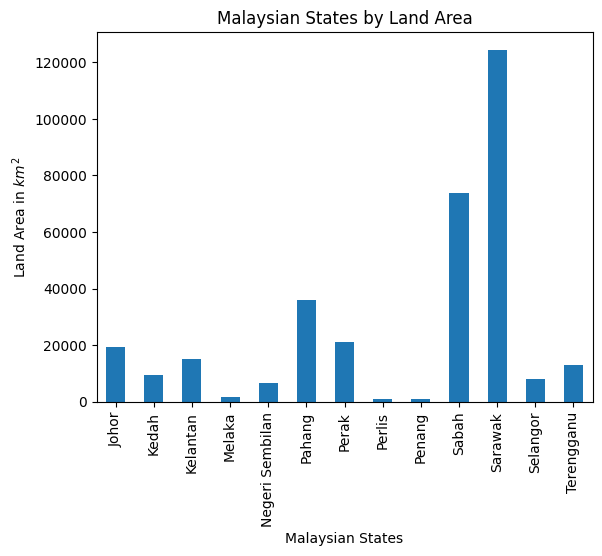

In [38]:
# Create graph
df['Area'].plot.bar()
plt.xticks(np.arange(13), (df['State']))
plt.xlabel('Malaysian States')
plt.ylabel('Land Area in $km^2$')
plt.title('Malaysian States by Land Area')
plt.show()

## Exercise

In [39]:
# list all the states
df_land_rank['State']

10            Sarawak
9               Sabah
5              Pahang
6               Perak
0               Johor
2            Kelantan
12         Terengganu
1               Kedah
11           Selangor
4     Negeri Sembilan
3              Melaka
8              Penang
7              Perlis
Name: State, dtype: object

In [40]:
# state the total area of Sabah and Sarawak
print(('East Malaysia Size: ', df_land_rank['Area'][0:2].sum()))

('East Malaysia Size: ', 198081)


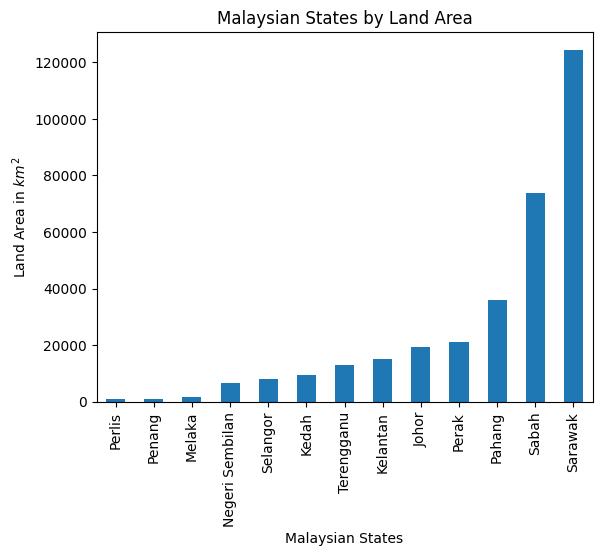

In [41]:
# plot a bar graph with ascending order of the area values
df_asc = df.copy()
df_asc = df_asc.sort_values('Area', ascending=True)

df_asc['Area'].plot.bar()
plt.xticks(np.arange(13), (df_asc['State']))
plt.xlabel('Malaysian States')
plt.ylabel('Land Area in $km^2$')
plt.title('Malaysian States by Land Area')
plt.show()

## Example

In [42]:
#Example 2
purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})
df = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 2', 'Store 2'])
df.head()

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 2,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


In [43]:
df.loc['Store 2']

,Name,Item Purchased,Cost
Store 2,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


In [44]:
type(df.loc['Store 2'])

pandas.core.frame.DataFrame

In [45]:
type(df.loc['Store 1'])

pandas.core.series.Series

In [46]:
df.loc['Store 1']

Name                 Chris
Item Purchased    Dog Food
Cost                  22.5
Name: Store 1, dtype: object

In [47]:
df.loc['Store 1', 'Cost']

22.5

In [48]:
#transpose dataframe
df.T

,Store 1,Store 2,Store 2
Name,Chris,Kevyn,Vinod
Item Purchased,Dog Food,Kitty Litter,Bird Seed
Cost,22.5,2.5,5.0


In [49]:
df.T.loc['Cost']

Store 1    22.5
Store 2     2.5
Store 2     5.0
Name: Cost, dtype: object

In [50]:
df['Cost']

Store 1    22.5
Store 2     2.5
Store 2     5.0
Name: Cost, dtype: float64

In [51]:
df.loc['Store 1']['Cost']

22.5

In [52]:
df.loc[:,['Name', 'Cost']]

,Name,Cost
Store 1,Chris,22.5
Store 2,Kevyn,2.5
Store 2,Vinod,5.0


In [53]:
#to return the dataset without a row
df.drop('Store 1')

,Name,Item Purchased,Cost
Store 2,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


In [54]:
#notice that drop doesn't not change the original dataset
#drop create a copy
df

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 2,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


In [55]:
copy_df = df.copy()
copy_df = copy_df.drop('Store 1')
copy_df

,Name,Item Purchased,Cost
Store 2,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


In [56]:
#use del
#will change the original dataset
del copy_df['Name']
copy_df

,Item Purchased,Cost
Store 2,Kitty Litter,2.5
Store 2,Bird Seed,5.0


In [57]:
#create a new column 'Location' with None value
df['Location'] = None
df

,Name,Item Purchased,Cost,Location
Store 1,Chris,Dog Food,22.5,None
Store 2,Kevyn,Kitty Litter,2.5,None
Store 2,Vinod,Bird Seed,5.0,None


## Exercise

In [66]:
# from which store Bird Seed was purchased?
df.index[df['Item Purchased'] == 'Bird Seed'][0]

'Store 2'